# Introduction:
The purpose of this project is to investigate whether the economic output of a country has a strong correlation with the life expectancy of its citizens.

Some of the questions explore in this project are the following:

+ Has the life expectancy increased overtime in each country?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


# Import Python Modules 

In [111]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm


# Loading the Data
Load the datasets into a DataFrame so it can be visualised 

In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.shape

(96, 4)

# Exploration of the Data

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [6]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [7]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side.

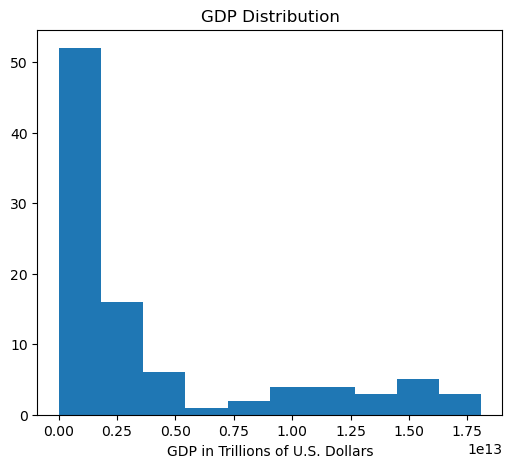

In [8]:
plt.figure(figsize = (6,5))
plt.hist(df.GDP)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.title('GDP Distribution')
plt.show()


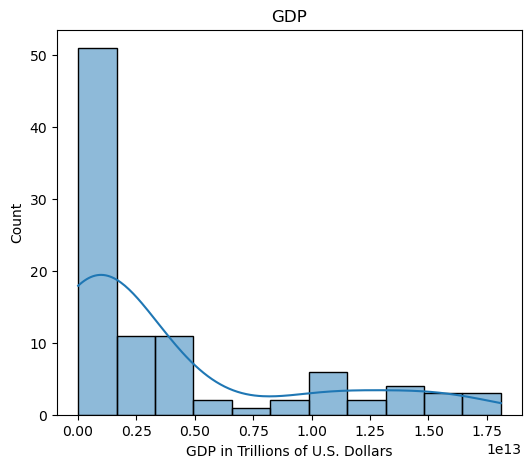

In [108]:
plt.figure(figsize=(6,5))
sns.histplot(df.GDP, kde = True)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title('GDP')
plt.show()



The distribution of `LEABY` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. Also there are smaller groupings of distributions within the range.

Text(0.5, 1.0, 'Life expectancy at birth')

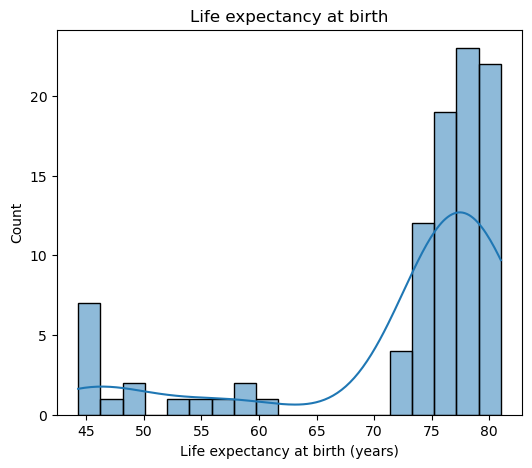

In [109]:
plt.figure(figsize=(6,5))
sns.histplot(df.LEABY, kde = True)
plt.xlabel("Life expectancy at birth (years)")
plt.title('Life expectancy at birth')

The previous plots did not break up the data by countries. The average `LEABY` and `GDP` by country are given below

In [11]:
dfMeans =  df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [12]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now bar plots showing the mean values for each variable are created below. 


For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

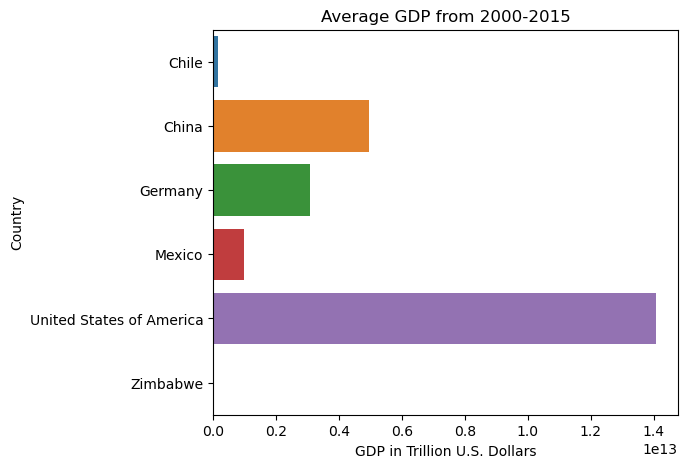

In [13]:
plt.figure(figsize = (6,5))
sns.barplot(x= 'GDP', y= 'Country', data = dfMeans)
plt.xlabel('GDP in Trillion U.S. Dollars')
plt.title('Average GDP from 2000-2015')
plt.show()


The average Life Expectancy of all the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before

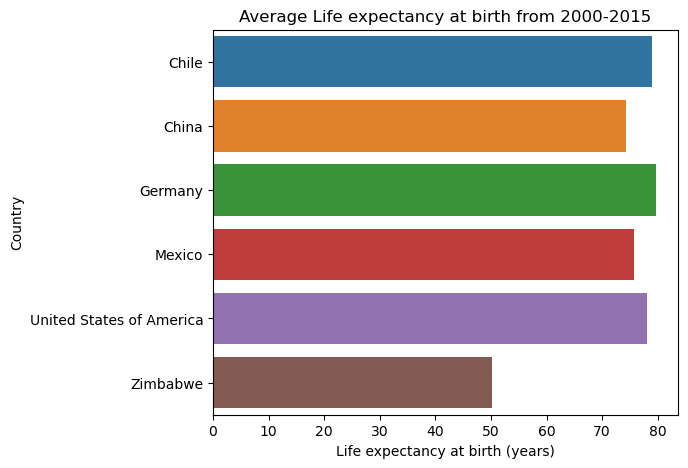

In [14]:
plt.figure(figsize = (6,5))
sns.barplot(x= 'LEABY', y= 'Country', data = dfMeans)
plt.xlabel('Life expectancy at birth (years)')
plt.title('Average Life expectancy at birth from 2000-2015')
plt.show()

#### Violin plots

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `LEABY` are on the y axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

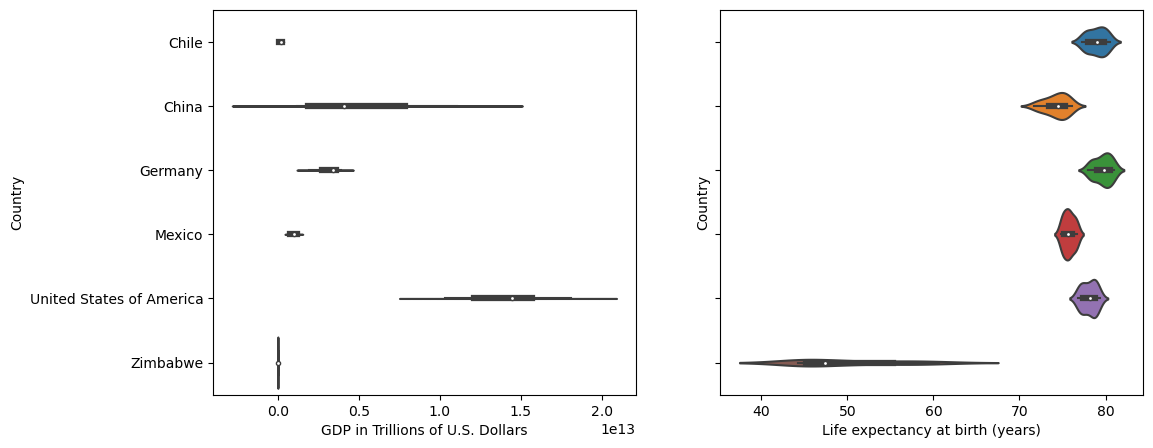

In [24]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")


#### Swarm plots

Swarm plots can be used to complement the box and violin plots. First the stand alone swarm plot is shown and then overlayed on top of a violin plot. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualisations. 

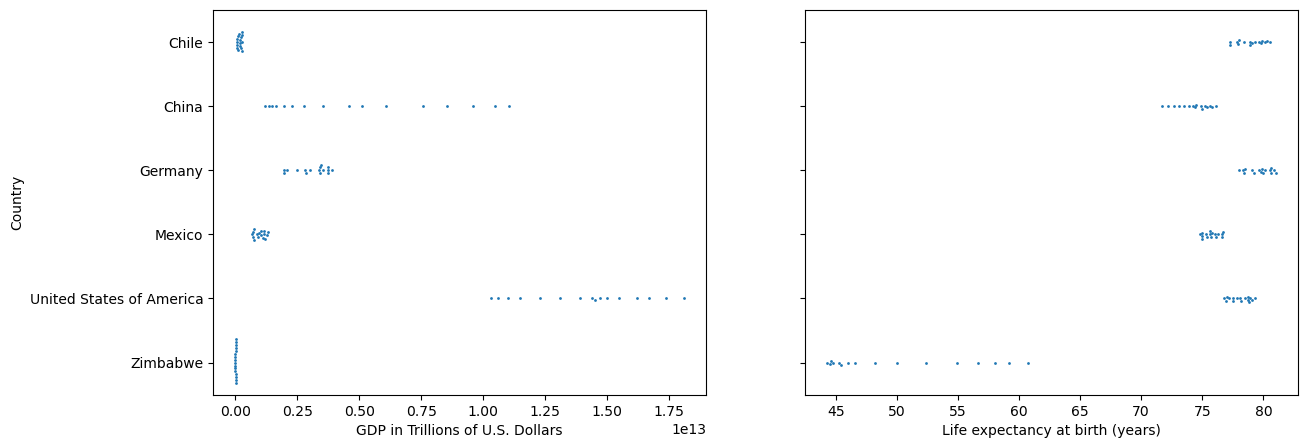

In [36]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(14, 5))
sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, size=2)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, size=2)
axes[1].set_xlabel("Life expectancy at birth (years)")

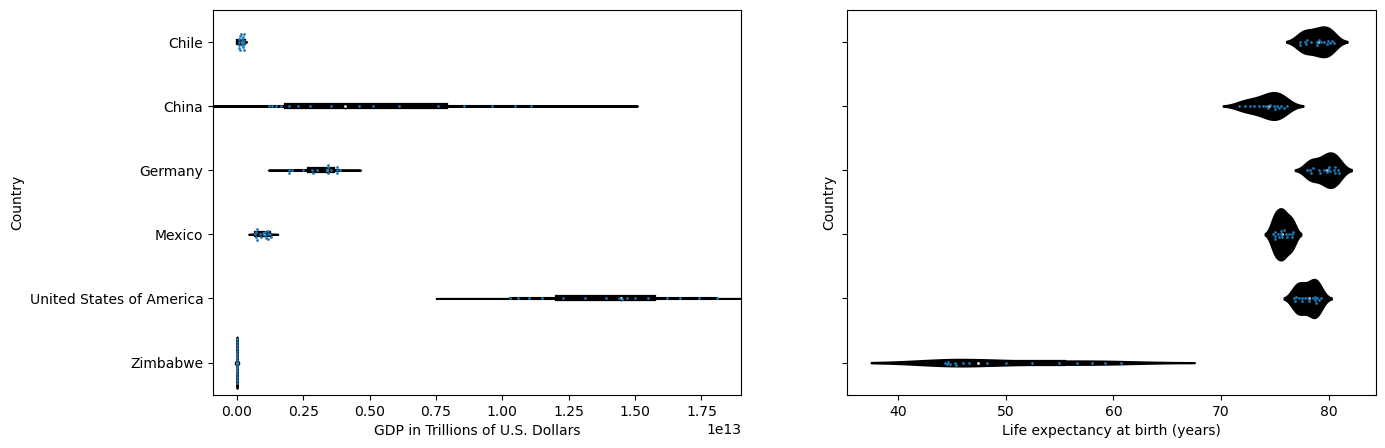

In [41]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country, size=2)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country, size=2)
axes[1].set_xlabel("Life expectancy at birth (years)")
plt.show()

#### Line Charts

Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

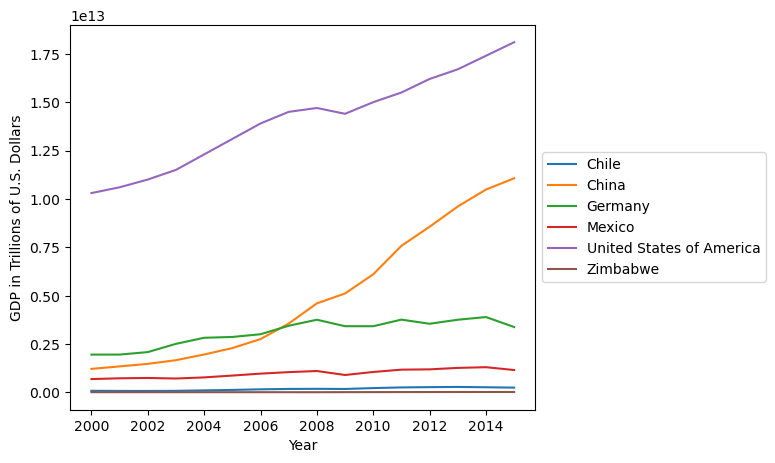

In [96]:
plt.figure(figsize=(6,5))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

Looking at the faceted line charts by Country makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their `GDP` over the years without the same scale.  

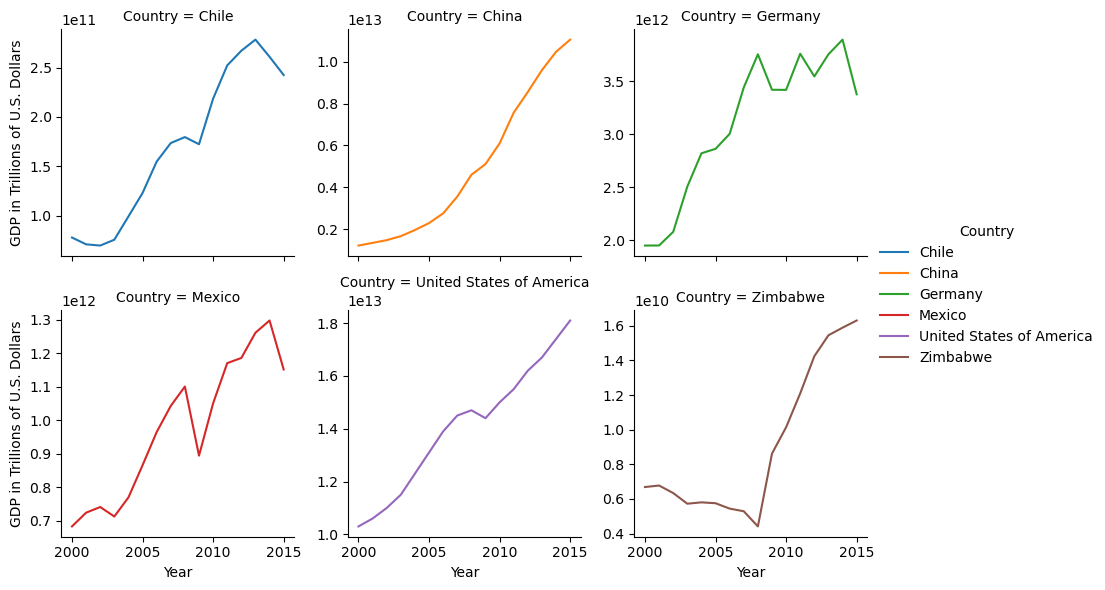

In [97]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

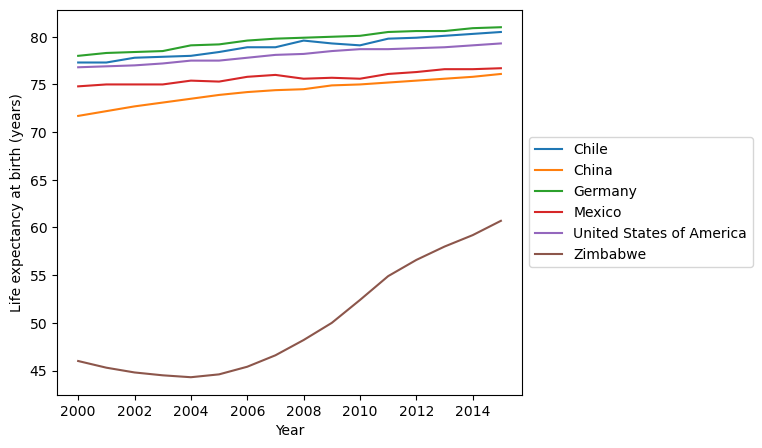

In [99]:
plt.figure(figsize=(6,5))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")

Simiar the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

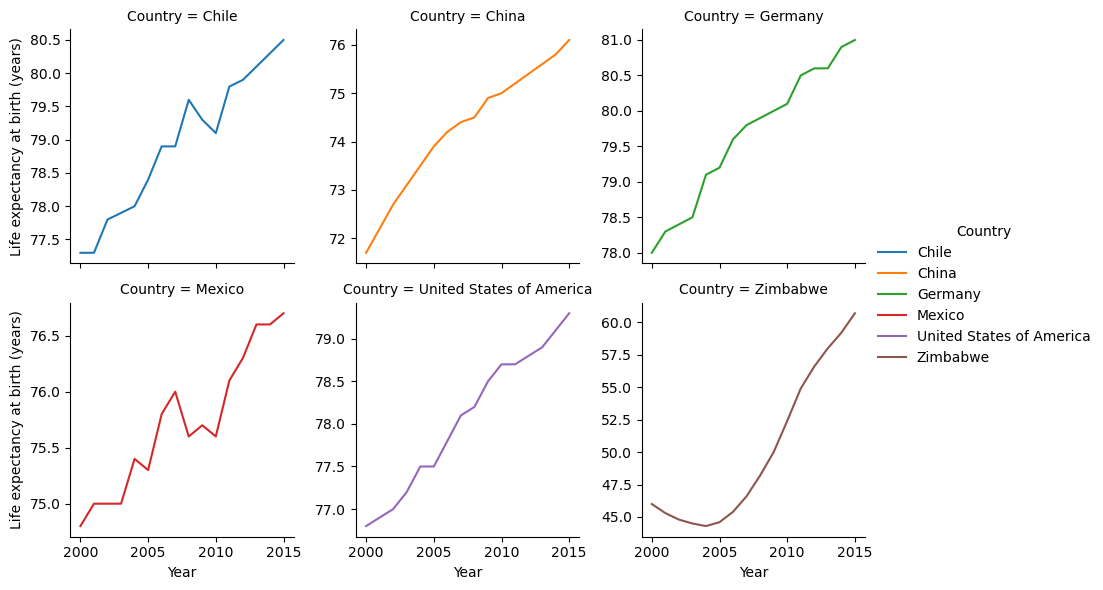

In [103]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))


#### Scatter Plot

In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

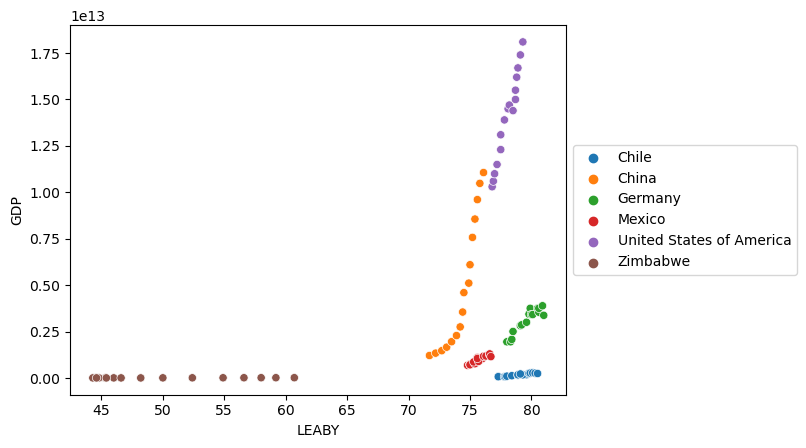

In [105]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

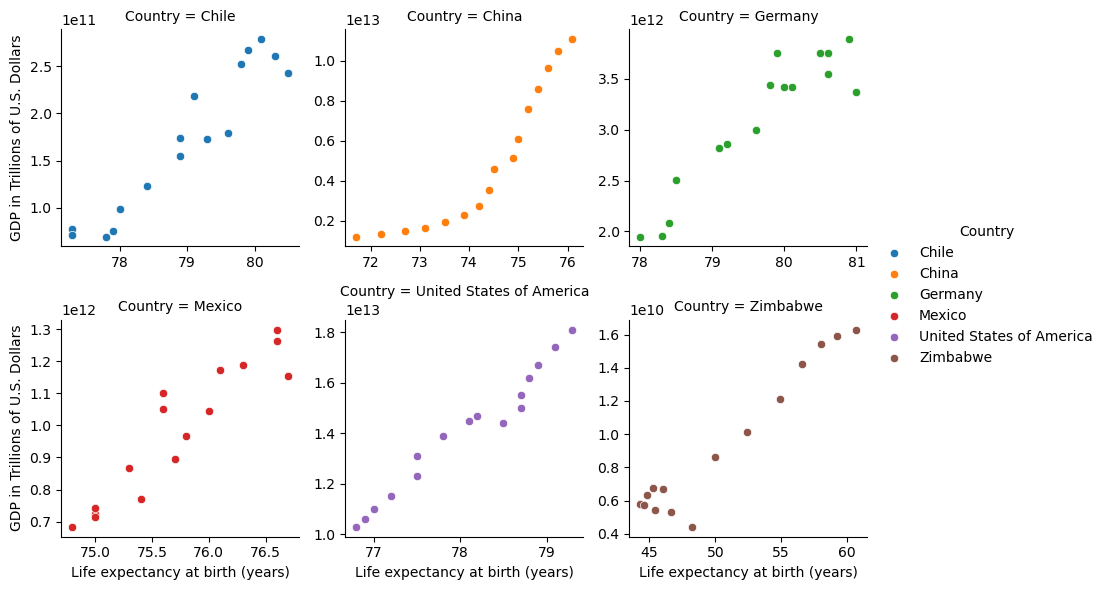

In [102]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

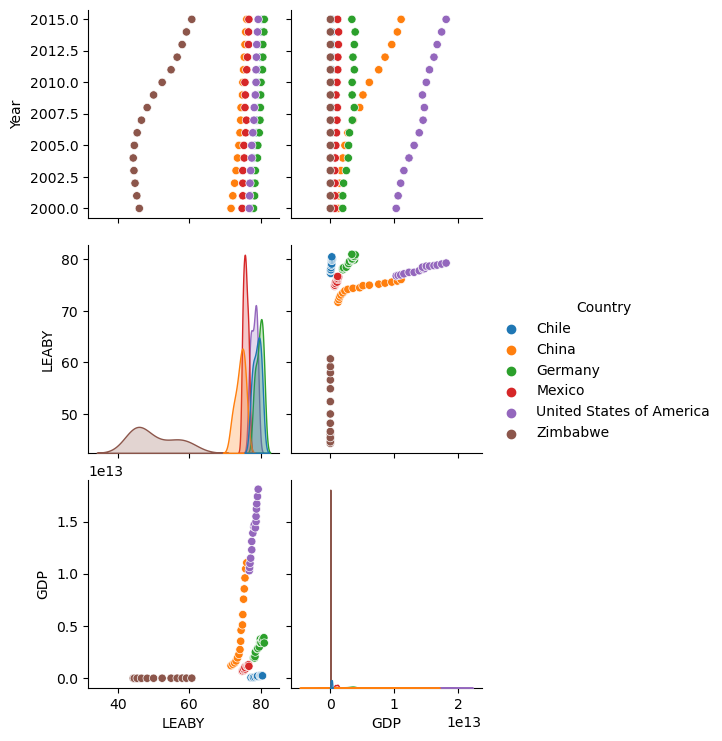

In [143]:
sns.pairplot(df, hue='Country', x_vars=['LEABY', 'GDP'], )
plt.show()

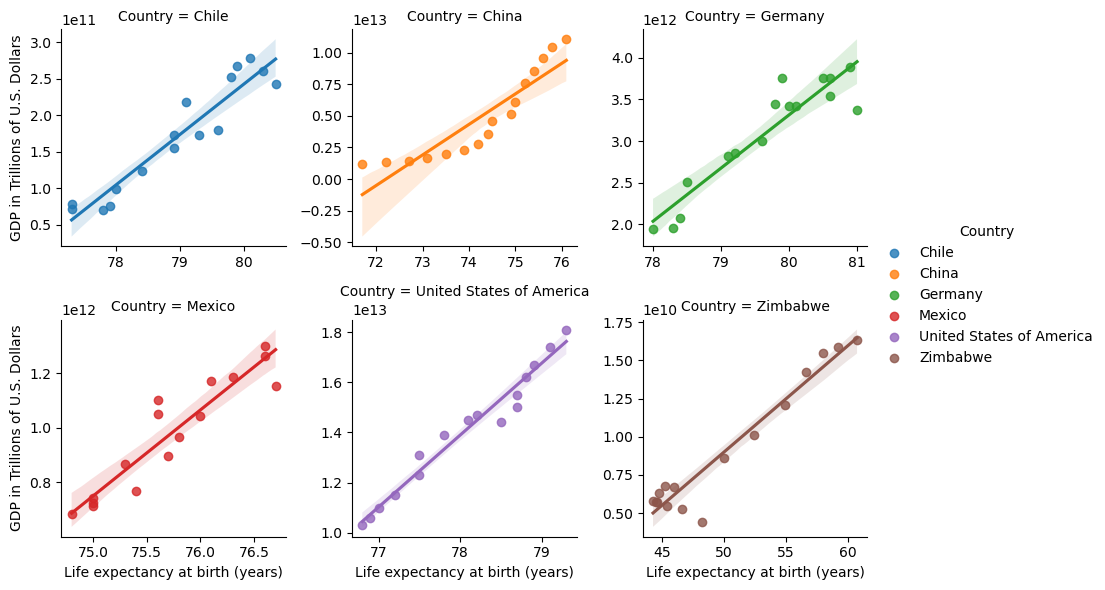

In [145]:

graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.regplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))
         

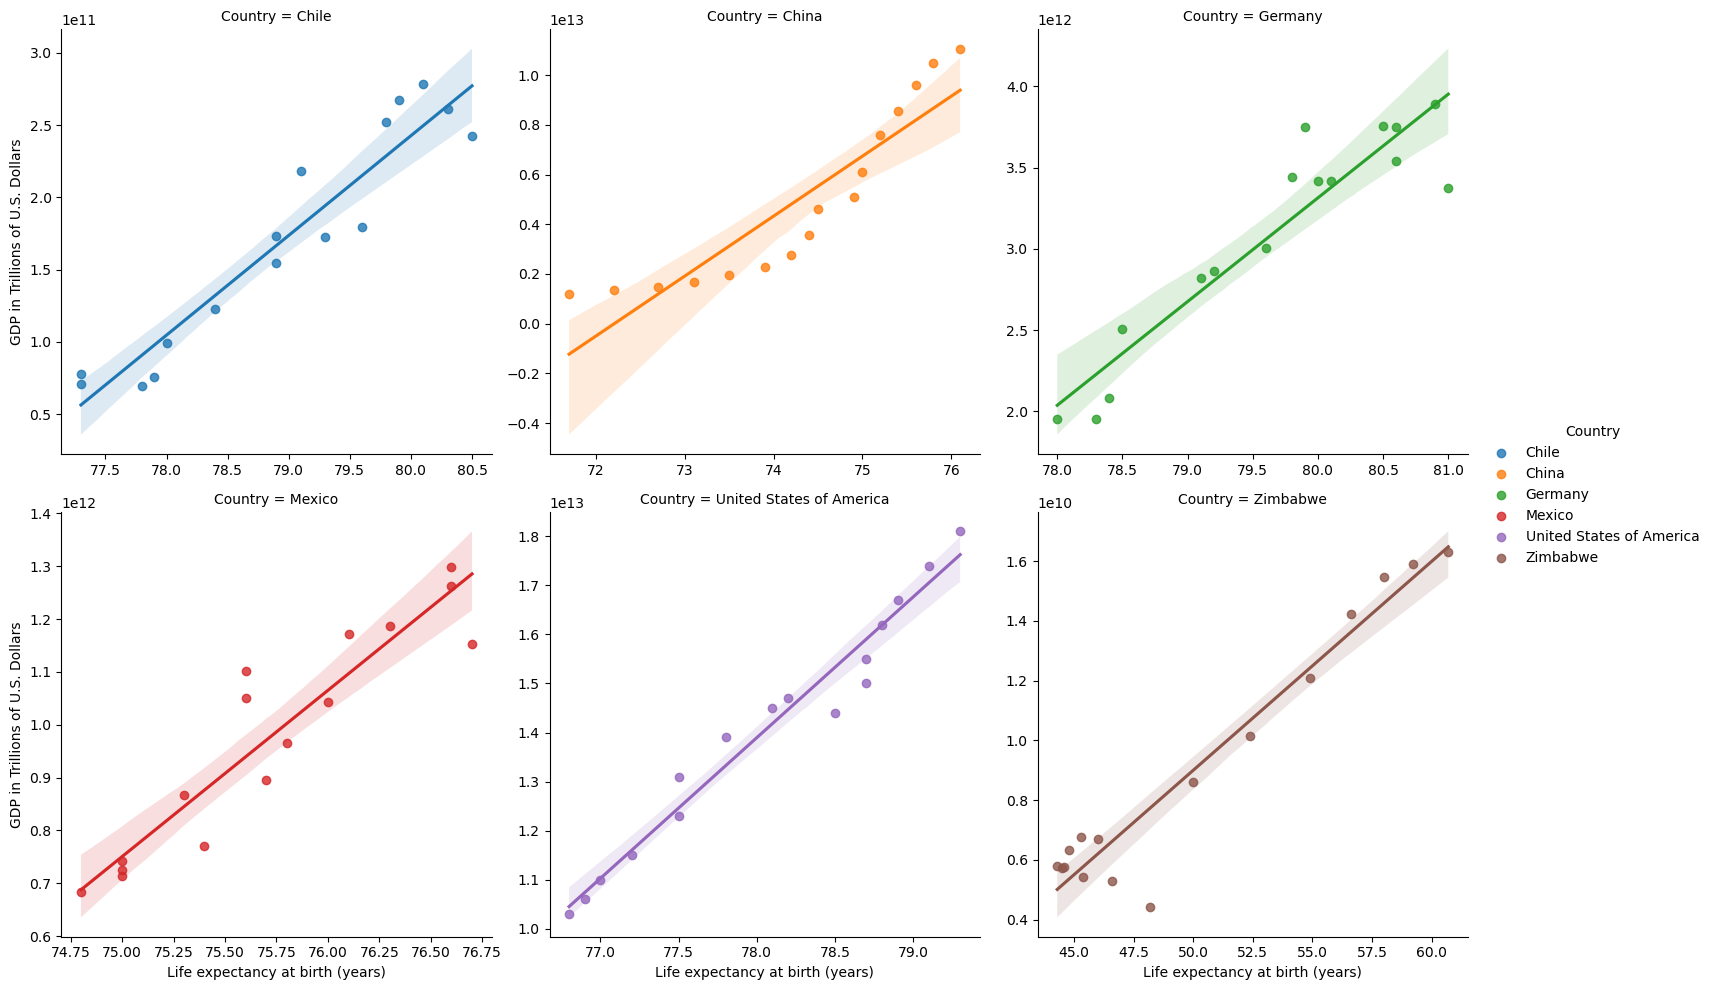

In [174]:
(sns.lmplot(data = df, x = 'LEABY', y = 'GDP', col = 'Country', col_wrap = 3, hue = 'Country', facet_kws=dict(sharey = False, sharex = False))
.add_legend()
.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))


# Conclusion 

This project was able to make quite a few data visualisations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.